<a href="https://colab.research.google.com/github/anujapande2001/MLProjects/blob/main/CementStrength_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cement Strength Prediction**

# **1. Introduction**


**Your client for this project is a major Concrete Producer..**


*  Their concrete stands out to be one of the best in the business and holds a contract with five of the most well known real estate companies.
*  Recently, they have developed a new kind of concrete which requires less water and is stronger and better than the concrete they used to sell.
*   They have few competitors who are also developing new kinds of concrete to launch in the market to get more clients.


**Current Scenario:**

* The regular price of concrete per cubic yard is around $100 to $200 but due to market inflation the current price has gone down and the company is at loss.

The company has developed a new concrete solution which can be a potential game-changer for the company in the market but they are not sure about the concrete compressive strength which is a very important factor for concrete sale.



# **2. Problem Statement**
**The current process suffers from the following problems:**

*   The company is under a time crunch to test the compressive strength of the concrete to release in the market.
*   Previously they were using manual methods to test the compressive strength of the concrete which is very time-consuming and inefficient.


The company has hired you as data science consultants. They want to automate the process of assigning the drug according to their health report.

**Your Role**
*   You are given a dataset containing materials used in the concrete.
*   Your task is to build a regression model using the dataset.
*   Because there was no machine learning model for this problem in the company, you don’t have a quantifiable win condition. You need to build the best possible model.


# **3. Import Libraries**

In [6]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler,RobustScaler
# # import sklearn.linear_model.LogisticRegression as LogisticRegression
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,roc_curve,auc,classification_report
# from sklearn.impute import KNNImputer
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# import warnings


# **4. Data Acquisition & Description**

In [7]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/concrete_train.csv")
dataValidation=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/concrete_test.csv")
dataValidationId=dataValidation.Id

data.head()


,Id,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,995,158.6,148.9,116.0,175.1,15.0,953.3,719.7,28,27.68
1,507,424.0,22.0,132.0,178.0,8.5,822.0,750.0,28,62.05
2,334,275.1,0.0,121.4,159.5,9.9,1053.6,777.5,3,23.80
3,848,252.0,97.0,76.0,194.0,8.0,835.0,821.0,28,33.40
4,294,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,3,7.40


### **4.1 Data Information**

- In this section we will see the **information about the types of the features**.




In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                824 non-null    int64  
 1   cement            824 non-null    float64
 2   slag              824 non-null    float64
 3   flyash            824 non-null    float64
 4   water             824 non-null    float64
 5   superplasticizer  824 non-null    float64
 6   coarseaggregate   824 non-null    float64
 7   fineaggregate     824 non-null    float64
 8   age               824 non-null    int64  
 9   csMPa             824 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 64.5 KB


In [9]:
dataValidation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                206 non-null    int64  
 1   cement            206 non-null    float64
 2   slag              206 non-null    float64
 3   flyash            206 non-null    float64
 4   water             206 non-null    float64
 5   superplasticizer  206 non-null    float64
 6   coarseaggregate   206 non-null    float64
 7   fineaggregate     206 non-null    float64
 8   age               206 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 14.6 KB


### **4.2 Data Description**

- In this section we will get **information about the data** and see some observations.

In [10]:
data.describe()

,Id,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000
mean,513.847087,283.360801,74.371602,53.160801,181.797087,6.163956,973.548544,772.107403,44.661408,35.857864
std,296.786779,107.536404,86.977784,64.000646,21.321905,5.967258,78.694630,80.984717,60.475702,16.865099
min,0.000000,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,251.750000,192.000000,0.000000,0.000000,164.900000,0.000000,932.000000,726.775000,12.250000,23.685000
50%,513.500000,275.100000,22.000000,0.000000,185.350000,6.100000,968.000000,778.500000,28.000000,34.080000
75%,770.250000,359.900000,144.775000,118.300000,192.000000,10.125000,1040.600000,821.250000,56.000000,45.862500
max,1028.000000,540.000000,359.400000,195.000000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


# **5. Data Pre-Processing**

### **5.1 Data Pre-Profiling**


**Check null value or any other inconsistent value in column**

In [11]:
print((data=="").sum(), "\n")

Id                  0
cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64 



In [12]:
print(data.isna().sum(), "\n")


Id                  0
cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64 



In [13]:
print((data=="Unknown").sum(), "\n")


Id                  0
cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64 



In [14]:
print((data==0).sum(), "\n")

Id                    1
cement                0
slag                377
flyash              461
water                 0
superplasticizer    304
coarseaggregate       0
fineaggregate         0
age                   0
csMPa                 0
dtype: int64 



In [15]:
data.duplicated().any()

False

**Check distribution of numerical features and Outliers**

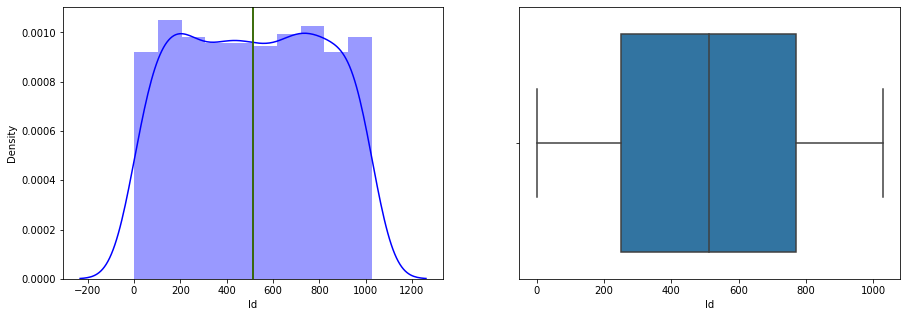

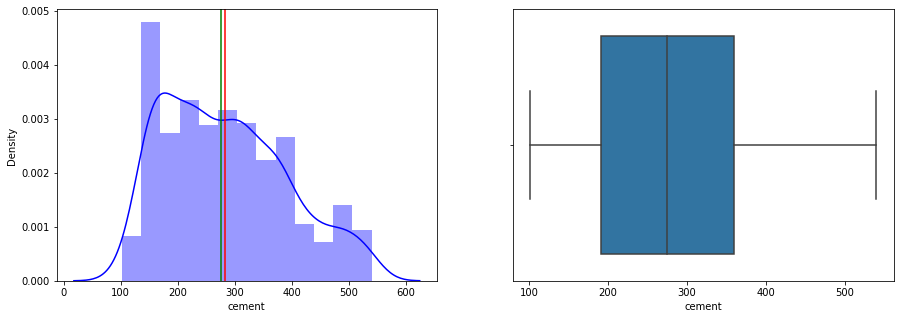

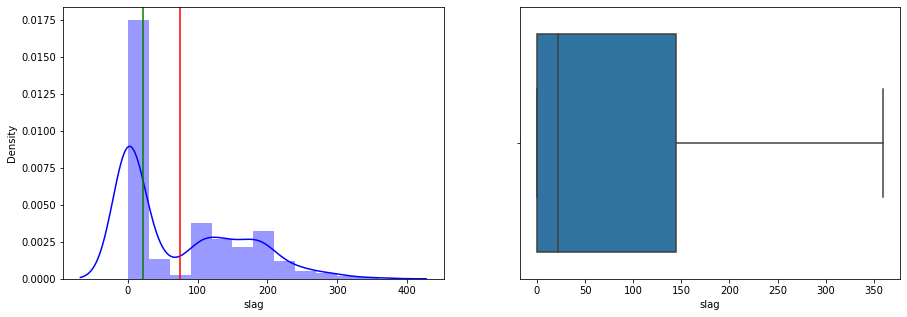

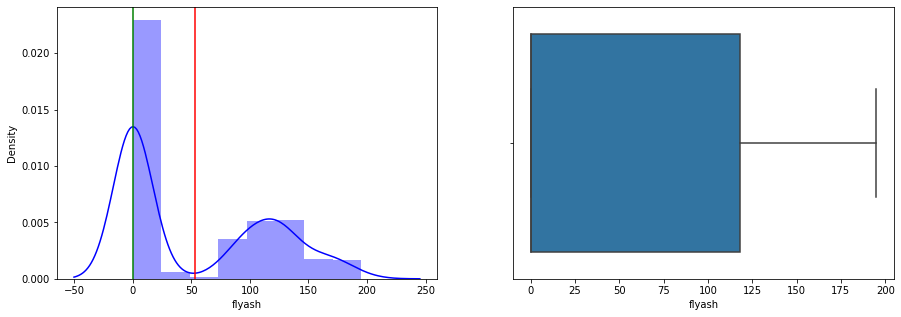

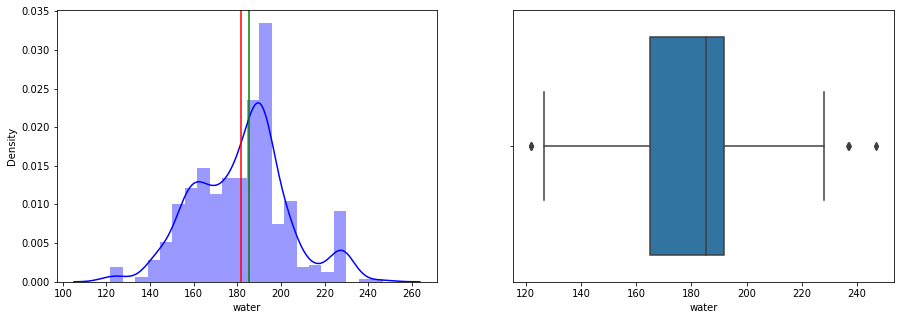

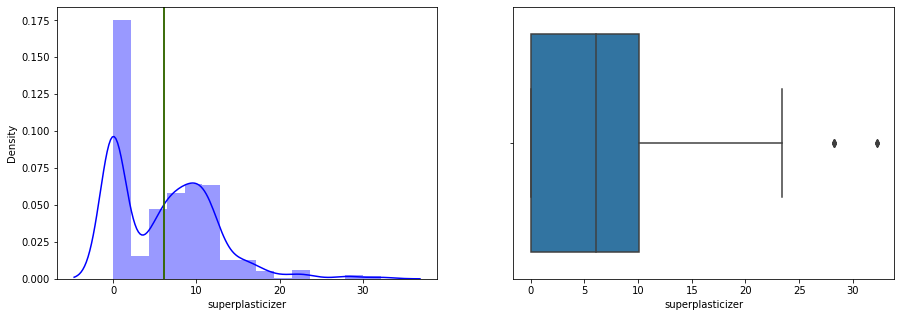

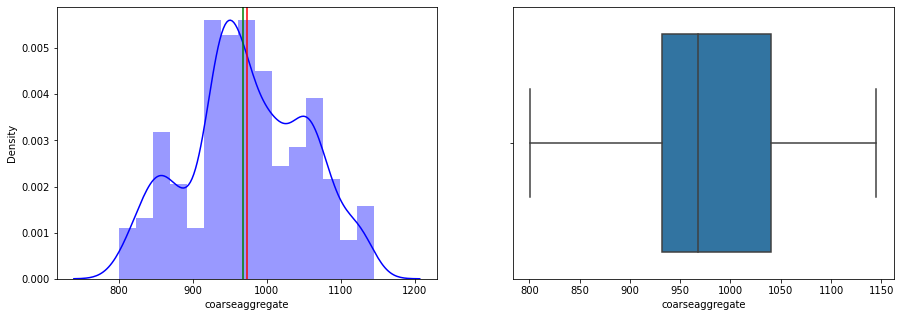

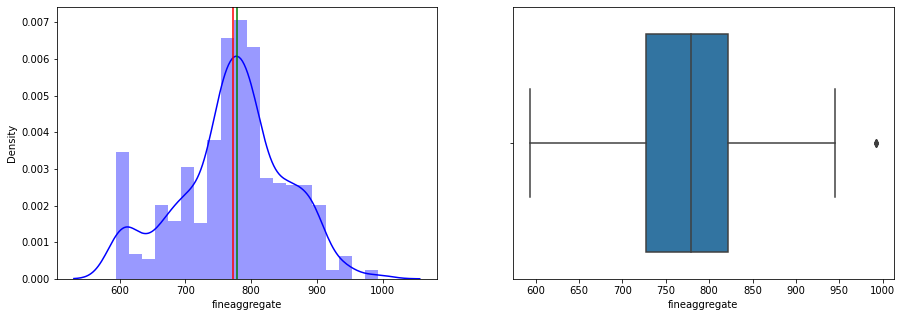

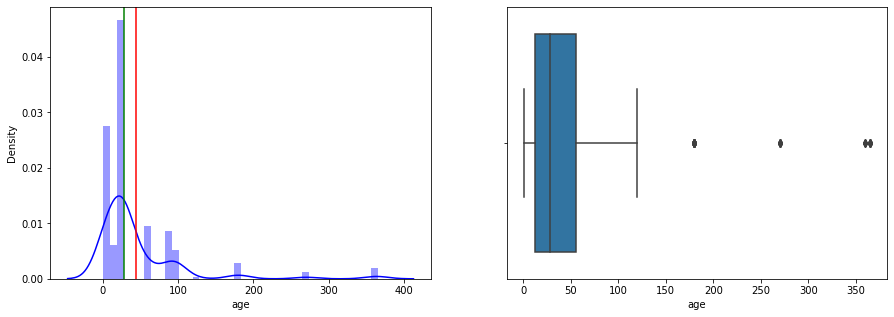

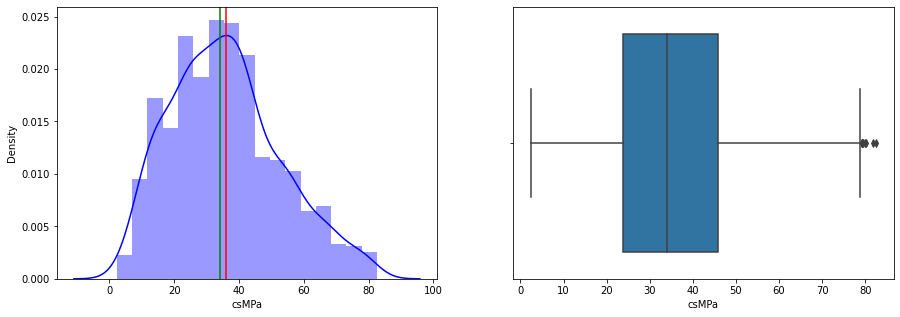

In [16]:
import warnings
warnings.filterwarnings("ignore")    
contColumn=data.select_dtypes(exclude=["object"])

for col in contColumn:  
  fig=plt.figure(figsize=[15,5])
  plt.subplot(1,2,1)
  sns.distplot(data[col], color="b")
  plt.axvline(data[col].mean(), color="r")
  plt.axvline(data[col].median(), color="g")
  plt.subplot(1,2,2)
  sns.boxplot(data[col])
  # quamtile_75=data[col].quantile(q=.75)
  # quamtile_25=data[col].quantile(q=.25)
  # iqr=quamtile_75-quamtile_25
  # lower_limit=quamtile_25-1.5*iqr
  # upper_limit=quamtile_75+1.5*iqr
  # outliers=data[col][(data[col]<lower_limit )|(data[col]>upper_limit)]
  # print("outliers in feature", col ,"are\n" ,outliers)
  # data.drop(index=outliers.index, inplace=True)

  

### **5.2 Data Cleaning**

- N/A

### **5.3 Data Post-Profiling**

- Next, we will generate and verify the report to identify any new observation that can help us in further analysis.

# **6. Exploratory Data Analysis**

### **Analize Relationship between Age and Strenght**

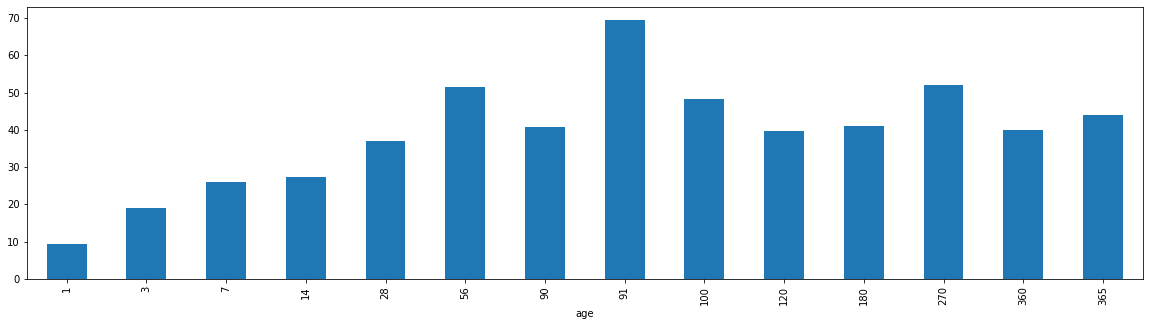

In [17]:
fig=plt.figure(figsize=[20,5])

# sns.histplot(data=data,x="age",bins=10,hue="csMPa",multiple="stack",stat="count")

data.groupby("age")["csMPa"].mean().plot.bar()

### **Correlation Matrix**

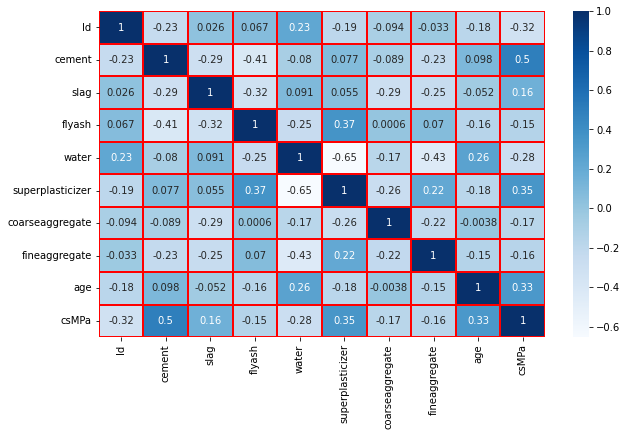

In [18]:
figure=plt.figure(figsize=[10,6])
sns.heatmap(data.corr(), cmap="Blues", annot=True,linecolor='Red',linewidth=1)

# **7. Data Post-Processing**

### **7.1 Data Preparation**



In [19]:
#**Remove Irrelavent Features**

data=data.drop(["Id"], axis=1)
dataValidation=dataValidation.drop(["Id"], axis=1)
X=data.drop("csMPa",axis=1)
y=data.csMPa



# **8. Model Development & Evaluation**

In [20]:
from sklearn.compose import make_column_transformer
from sklearn.model_selection import cross_val_score,cross_validate,cross_val_predict
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor,AdaBoostRegressor,GradientBoostingRegressor
# from sklearn.ensemble import RandomForestClassifier
# Define which columns should be scaled
columns_to_scale=X.columns.to_list()

# Instantiate column transformer
column_trans=make_column_transformer((RobustScaler(),columns_to_scale))
x_trans=pd.DataFrame(column_trans.fit_transform(X))
x_trans
x_trans.isna().sum()
# Instantiate Decision Tree Model
mdlList=[RandomForestRegressor(),BaggingRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]
score_df=pd.DataFrame(columns=["ModelName","TrainScore","TestScore"])
for mdl in mdlList:
  # Make Pipeline
  pipe=make_pipeline(column_trans,mdl)
  cv_score=cross_validate(pipe,X,y,cv=5,n_jobs=-1,scoring="neg_root_mean_squared_error",return_train_score=True)
  cv_score_df=pd.DataFrame(cv_score)
  score_df=score_df.append({"ModelName":mdl,"TrainScore":cv_score_df.train_score.mean(),
                   "TestScore":cv_score_df.test_score.mean()},ignore_index=True)
  # print(cv_score_df.mean())
score_df

# dataValidation_pred=pipe.predict(dataValidation)

# submission = pd.DataFrame({'Id':dataValidationId,'Drug':dataValidation_pred})
# from google.colab import files
# submission.to_csv('submission.csv', encoding = 'utf-8-sig',index=False,header=False) 
# files.download('submission.csv')




,ModelName,TrainScore,TestScore
0,RandomForestRegressor(),-2.082416,-5.145903
1,BaggingRegressor(),-2.505226,-5.560222
2,AdaBoostRegressor(),-6.949152,-7.760878
3,GradientBoostingRegressor(),-3.645655,-5.243486


In [21]:
pipe=make_pipeline(column_trans,GradientBoostingRegressor())
pipe.fit(X,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('robustscaler',
                                                  RobustScaler(),
                                                  ['cement', 'slag', 'flyash',
                                                   'water', 'superplasticizer',
                                                   'coarseaggregate',
                                                   'fineaggregate', 'age'])])),
                ('gradientboostingregressor', GradientBoostingRegressor())])

# **9. Dump Model using Pickle**

In [22]:
import pickle

##dump the model into a file
with open("/content/drive/MyDrive/Colab Notebooks/ModelBin/cement_model.pkl", 'wb') as f_out:
    pickle.dump(pipe, f_out) # write final_model in .bin file
    f_out.close()  # close the file 

# **10. Load Model using Pickle and Predict Output**

In [23]:
##loading the model from the saved file
with open('/content/drive/MyDrive/Colab Notebooks/ModelBin/cement_model.pkl', 'rb') as f_in:
    model = pickle.load(f_in)

##Predict
dataValidation_pred=model.predict(dataValidation)
# print(dataValidation_pred)

submission = pd.DataFrame({'Id':dataValidationId,'csMPa':dataValidation_pred})
from google.colab import files
submission.to_csv('submission.csv', encoding = 'utf-8-sig',index=False,header=False) 
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>